# Analysis on car emissions predictions by using Green House Gas Sore (GHG)





## by Mostafa Teleb

## General preview

### the climate change one of the most important issues in current world one of the indecators that increases this issue is green house score

### green house score or GHG score is a indecator rated from 1 to 10 due to its effect on the climate

### green house score measured by the amount of car emission that prodused from the cars

### In this project we will predict the GHG score due to the car emissions

### Import libaries

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRFRegressor
import seaborn as sns
import warnings

### Get The Data

In [246]:
df=pd.read_csv('us-vehicle-fuel-economy-data-1984-2017.csv',sep=';')
df.head()

,Year,Manufacturer,Model,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,2020,Chevrolet,Silverado 4WD,19.388824,0,0,0,15,14,0,...,GMX,NaN,0,NaN,2019-08-15,2019-11-27,N,0,0,0
1,2020,GMC,Sierra 4WD,18.311667,0,0,0,16,15,0,...,GMX,NaN,0,NaN,2019-08-15,2019-10-24,Y,0,0,0
2,2020,GMC,Sierra 4WD,19.388824,0,0,0,15,14,0,...,GMX,NaN,0,NaN,2019-08-15,2019-10-24,N,0,0,0
3,2020,GMC,Sierra 4WD AT4,20.600625,0,0,0,14,14,0,...,GMX,NaN,0,NaN,2019-08-15,2019-10-24,N,0,0,0
4,2020,GMC,Sierra 4WD,15.924375,0,0,0,22,22,0,...,GMX,NaN,0,NaN,2019-08-15,2020-05-27,Y,0,0,0


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44632 entries, 0 to 44631
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             44632 non-null  int64  
 1   Manufacturer     44632 non-null  object 
 2   Model            44632 non-null  object 
 3   barrels08        44632 non-null  float64
 4   barrelsA08       44632 non-null  int64  
 5   charge120        44632 non-null  int64  
 6   charge240        44632 non-null  int64  
 7   city08           44632 non-null  int64  
 8   city08U          44632 non-null  int64  
 9   cityA08          44632 non-null  int64  
 10  cityA08U         44632 non-null  int64  
 11  cityCD           44632 non-null  int64  
 12  cityE            44632 non-null  int64  
 13  cityUF           44632 non-null  int64  
 14  co2              44632 non-null  int64  
 15  co2A             44632 non-null  int64  
 16  co2TailpipeAGpm  44632 non-null  int64  
 17  co2TailpipeG

In [248]:
df['ghgScore'].unique()

array([ 3,  2,  4, -1,  7,  5, 10,  1,  6,  8,  9], dtype=int64)

### Data Cleaning

In [249]:
df=df[['cylinders','VClass','drive','trany','displ','fuelType1','barrels08'
     ,'ghgScore','phevBlended','lv2','lv4','pv2','pv4','rangeHwy']]

In [250]:
print(df.shape)
df.head()

(44632, 14)


,cylinders,VClass,drive,trany,displ,fuelType1,barrels08,ghgScore,phevBlended,lv2,lv4,pv2,pv4,rangeHwy
0,6.0,Standard Pickup Trucks 4WD,4-Wheel Drive,Automatic 6-spd,4.3,Regular Gasoline,19.388824,3,False,0,0,0,0,0
1,8.0,Standard Pickup Trucks 4WD,4-Wheel Drive,Automatic 8-spd,5.3,Regular Gasoline,18.311667,3,False,0,0,0,0,0
2,8.0,Standard Pickup Trucks 4WD,4-Wheel Drive,Automatic 6-spd,5.3,Regular Gasoline,19.388824,3,False,0,0,0,0,0
3,8.0,Standard Pickup Trucks 4WD,4-Wheel Drive,Automatic 6-spd,5.3,Regular Gasoline,20.600625,2,False,0,0,0,0,0
4,6.0,Standard Pickup Trucks 4WD,4-Wheel Drive,Automatic 10-spd,3.0,Diesel,15.924375,4,False,0,0,0,0,0


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44632 entries, 0 to 44631
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cylinders    44276 non-null  float64
 1   VClass       44632 non-null  object 
 2   drive        43446 non-null  object 
 3   trany        44621 non-null  object 
 4   displ        44278 non-null  float64
 5   fuelType1    44632 non-null  object 
 6   barrels08    44632 non-null  float64
 7   ghgScore     44632 non-null  int64  
 8   phevBlended  44632 non-null  bool   
 9   lv2          44632 non-null  int64  
 10  lv4          44632 non-null  int64  
 11  pv2          44632 non-null  int64  
 12  pv4          44632 non-null  int64  
 13  rangeHwy     44632 non-null  int64  
dtypes: bool(1), float64(3), int64(6), object(4)
memory usage: 4.5+ MB


In [252]:
pv=[]
pv1=[]
for pv2 in df['pv2']:
    if pv2!=0:
      #  pv='pv2'
        pv.append('pv2')
    else:
        pv.append(0)
        
        
for pv4 in df['pv4']:
    if pv4!=0:
      #  pv='pv2'
        pv1.append('pv4')
    else:
        pv1.append(0)

        

In [253]:
pv6=[]
for a,b in zip(pv,pv1):
    if a==0 and b==0:
        pv6.append(0)
    elif a=='pv2'and b =='pv4':
        pv6.append('pv4')
    elif a == 'pv2':
        pv6.append('pv2')
    elif b == 'pv4':
        pv6.append('pv4')
    else:
        pass

In [254]:
df['pv']=pv6

In [255]:
lv=[]
lv1=[]
for lv2 in df['lv2']:
    if lv!=0:
        lv.append('lv2')
    else:
        lv.append(0)
        
        
for lv4 in df['lv4']:
    if lv4!=0:
      #  pv='pv2'
        lv1.append('lv4')
    else:
        lv1.append(0)

        

In [256]:
lv6=[]
for a,b in zip(lv,lv1):
    if a==0 and b==0:
        lv6.append(0)
    elif a=='lv2'and b =='lv4':
        lv6.append('lv4')
    elif a == 'lv2':
        lv6.append('lv2')
    elif b == 'lv4':
        lv6.append('lv4')
    else:
        pass

In [257]:
df2=pd.DataFrame({'lv':lv6})

In [258]:
df['lv']=df2

In [259]:
df.head()

,cylinders,VClass,drive,trany,displ,fuelType1,barrels08,ghgScore,phevBlended,lv2,lv4,pv2,pv4,rangeHwy,pv,lv
0,6.0,Standard Pickup Trucks 4WD,4-Wheel Drive,Automatic 6-spd,4.3,Regular Gasoline,19.388824,3,False,0,0,0,0,0,0,lv2
1,8.0,Standard Pickup Trucks 4WD,4-Wheel Drive,Automatic 8-spd,5.3,Regular Gasoline,18.311667,3,False,0,0,0,0,0,0,lv2
2,8.0,Standard Pickup Trucks 4WD,4-Wheel Drive,Automatic 6-spd,5.3,Regular Gasoline,19.388824,3,False,0,0,0,0,0,0,lv2
3,8.0,Standard Pickup Trucks 4WD,4-Wheel Drive,Automatic 6-spd,5.3,Regular Gasoline,20.600625,2,False,0,0,0,0,0,0,lv2
4,6.0,Standard Pickup Trucks 4WD,4-Wheel Drive,Automatic 10-spd,3.0,Diesel,15.924375,4,False,0,0,0,0,0,0,lv2


In [260]:
df['cylinders'].fillna(df['cylinders'].mode()[0],inplace=True)
df['drive'].fillna(df['drive'].mode()[0],inplace=True)
df['trany'].fillna(df['trany'].mode()[0],inplace=True)
df['displ'].fillna(df['displ'].mode()[0],inplace=True)
df['ghgScore'] = df['ghgScore'].abs()
warnings.filterwarnings('ignore')
df.drop(['lv2','lv4','pv2','pv4'],axis=1, inplace=True)

In [261]:
print(df.shape)
df.head()

(44632, 12)


,cylinders,VClass,drive,trany,displ,fuelType1,barrels08,ghgScore,phevBlended,rangeHwy,pv,lv
0,6.0,Standard Pickup Trucks 4WD,4-Wheel Drive,Automatic 6-spd,4.3,Regular Gasoline,19.388824,3,False,0,0,lv2
1,8.0,Standard Pickup Trucks 4WD,4-Wheel Drive,Automatic 8-spd,5.3,Regular Gasoline,18.311667,3,False,0,0,lv2
2,8.0,Standard Pickup Trucks 4WD,4-Wheel Drive,Automatic 6-spd,5.3,Regular Gasoline,19.388824,3,False,0,0,lv2
3,8.0,Standard Pickup Trucks 4WD,4-Wheel Drive,Automatic 6-spd,5.3,Regular Gasoline,20.600625,2,False,0,0,lv2
4,6.0,Standard Pickup Trucks 4WD,4-Wheel Drive,Automatic 10-spd,3.0,Diesel,15.924375,4,False,0,0,lv2


### Data Analysis

In [262]:
df=df.sample(200)

In [263]:
df.head()

,cylinders,VClass,drive,trany,displ,fuelType1,barrels08,ghgScore,phevBlended,rangeHwy,pv,lv
17911,6.0,Compact Cars,Front-Wheel Drive,Automatic 4-spd,2.5,Regular Gasoline,14.982273,1,False,0,pv4,lv4
1608,6.0,Standard Pickup Trucks,4-Wheel or All-Wheel Drive,Automatic 4-spd,3.9,Regular Gasoline,20.600625,1,False,0,0,lv2
37667,4.0,Compact Cars,All-Wheel Drive,Automatic (AM6),2.0,Premium Gasoline,17.347895,1,False,0,pv4,lv4
23940,4.0,Small Sport Utility Vehicle 2WD,Front-Wheel Drive,Automatic (S8),2.0,Regular Gasoline,13.184400,5,False,0,0,lv2
1660,4.0,Special Purpose Vehicles,4-Wheel or All-Wheel Drive,Manual 5-spd,2.6,Regular Gasoline,20.600625,1,False,0,0,lv2


In [264]:
sns.set(rc={'figure.figsize':(15,5)})

<AxesSubplot:xlabel='ghgScore', ylabel='Density'>

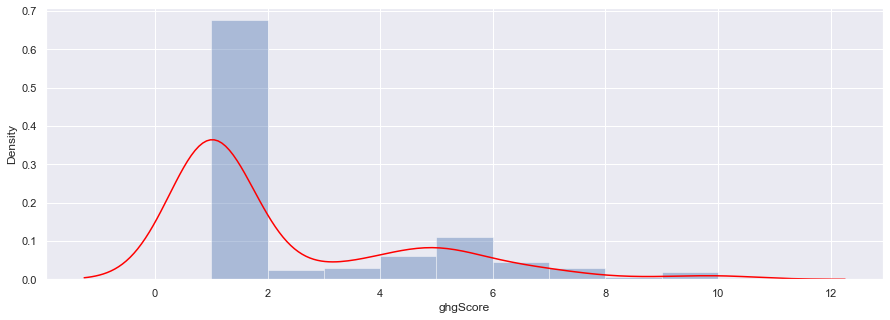

In [265]:
sns.distplot(df['ghgScore'],kde_kws={"color": "red"})

In [266]:
sns.set_context("paper", rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":15})#,'figure.figsize':(70,20)})

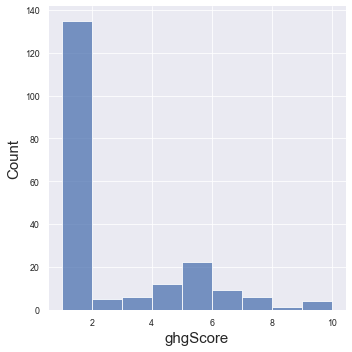

In [267]:
sns.displot(df['ghgScore'],kde_kws={"color": "red"})

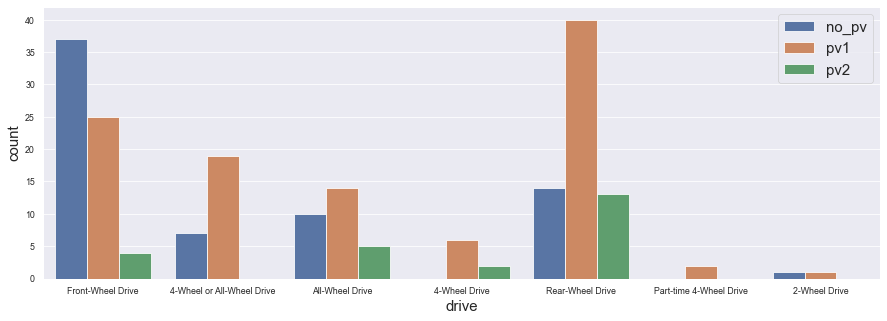

In [268]:
sns.set_context("paper", rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":15})
sns.countplot(x='drive',hue='pv',data=df)
plt.legend(labels=["no_pv","pv1","pv2"], fontsize = 15)

<AxesSubplot:xlabel='trany', ylabel='count'>

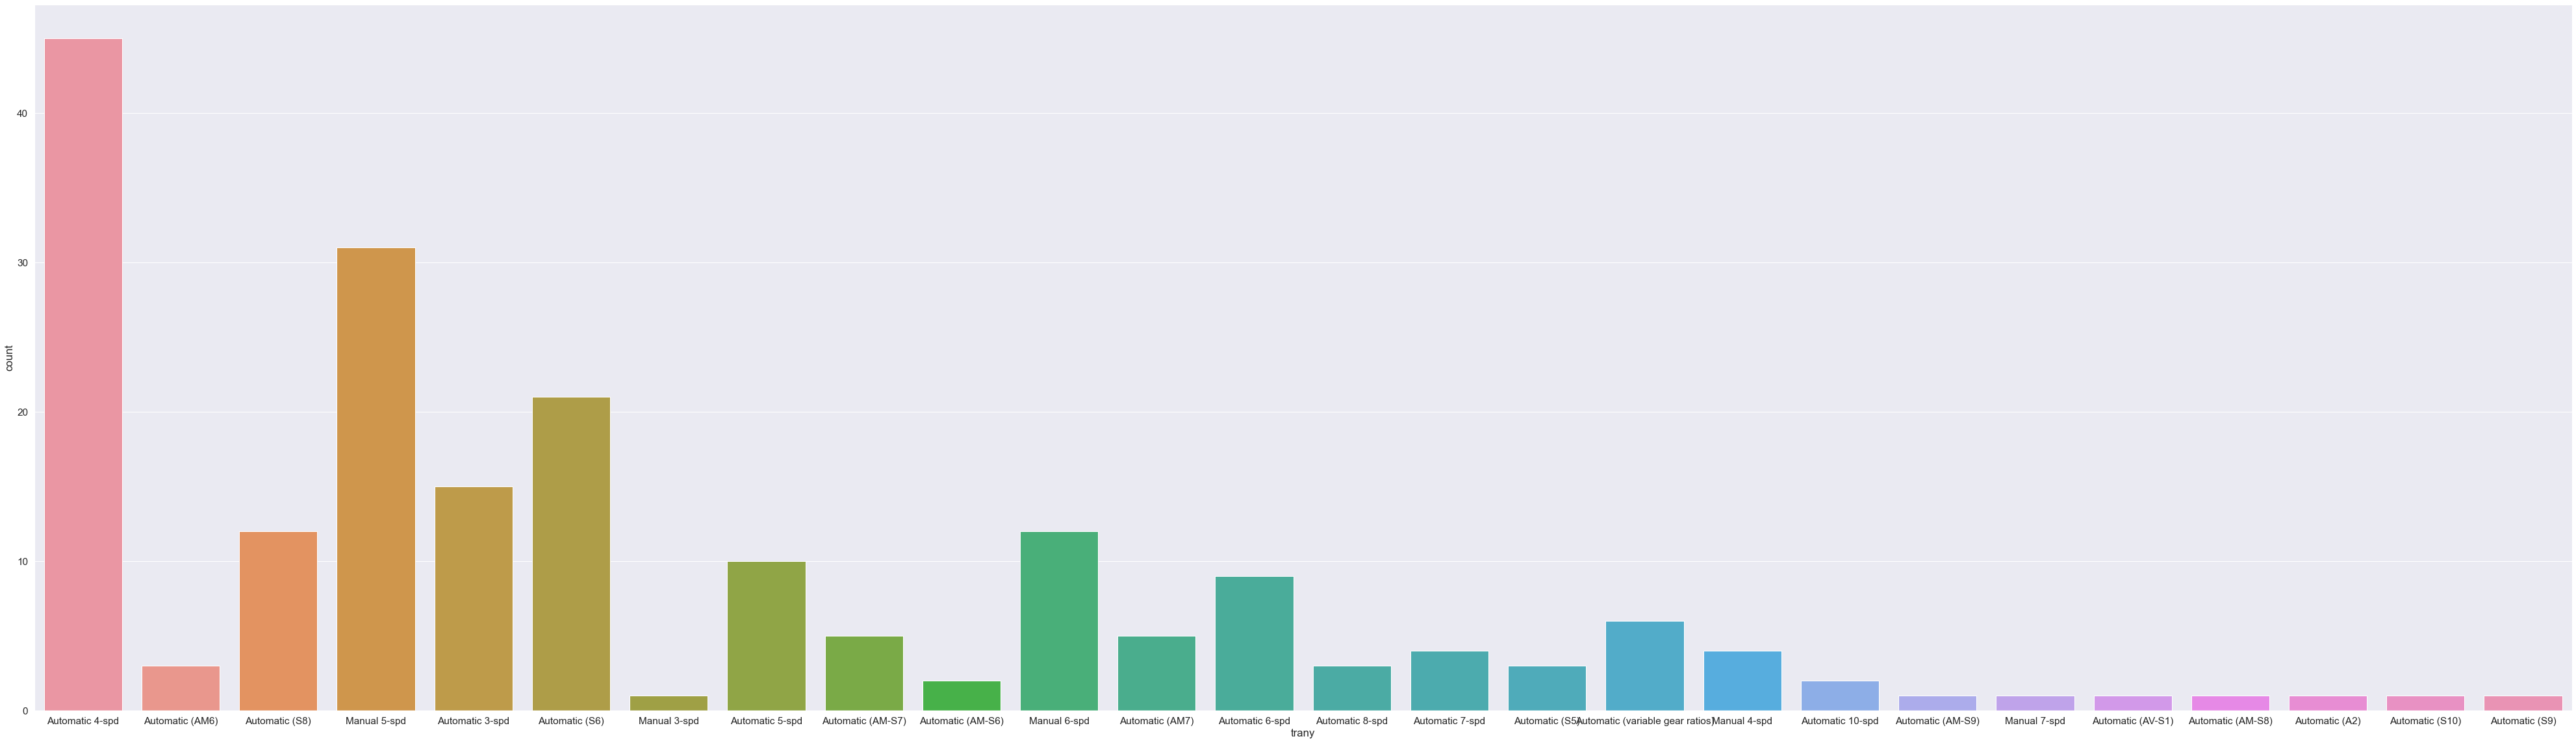

In [269]:
sns.set({'figure.figsize':(70,20)})
sns.set(font_scale=1.4)
sns.countplot(x='trany',data=df)

<AxesSubplot:xlabel='VClass', ylabel='count'>

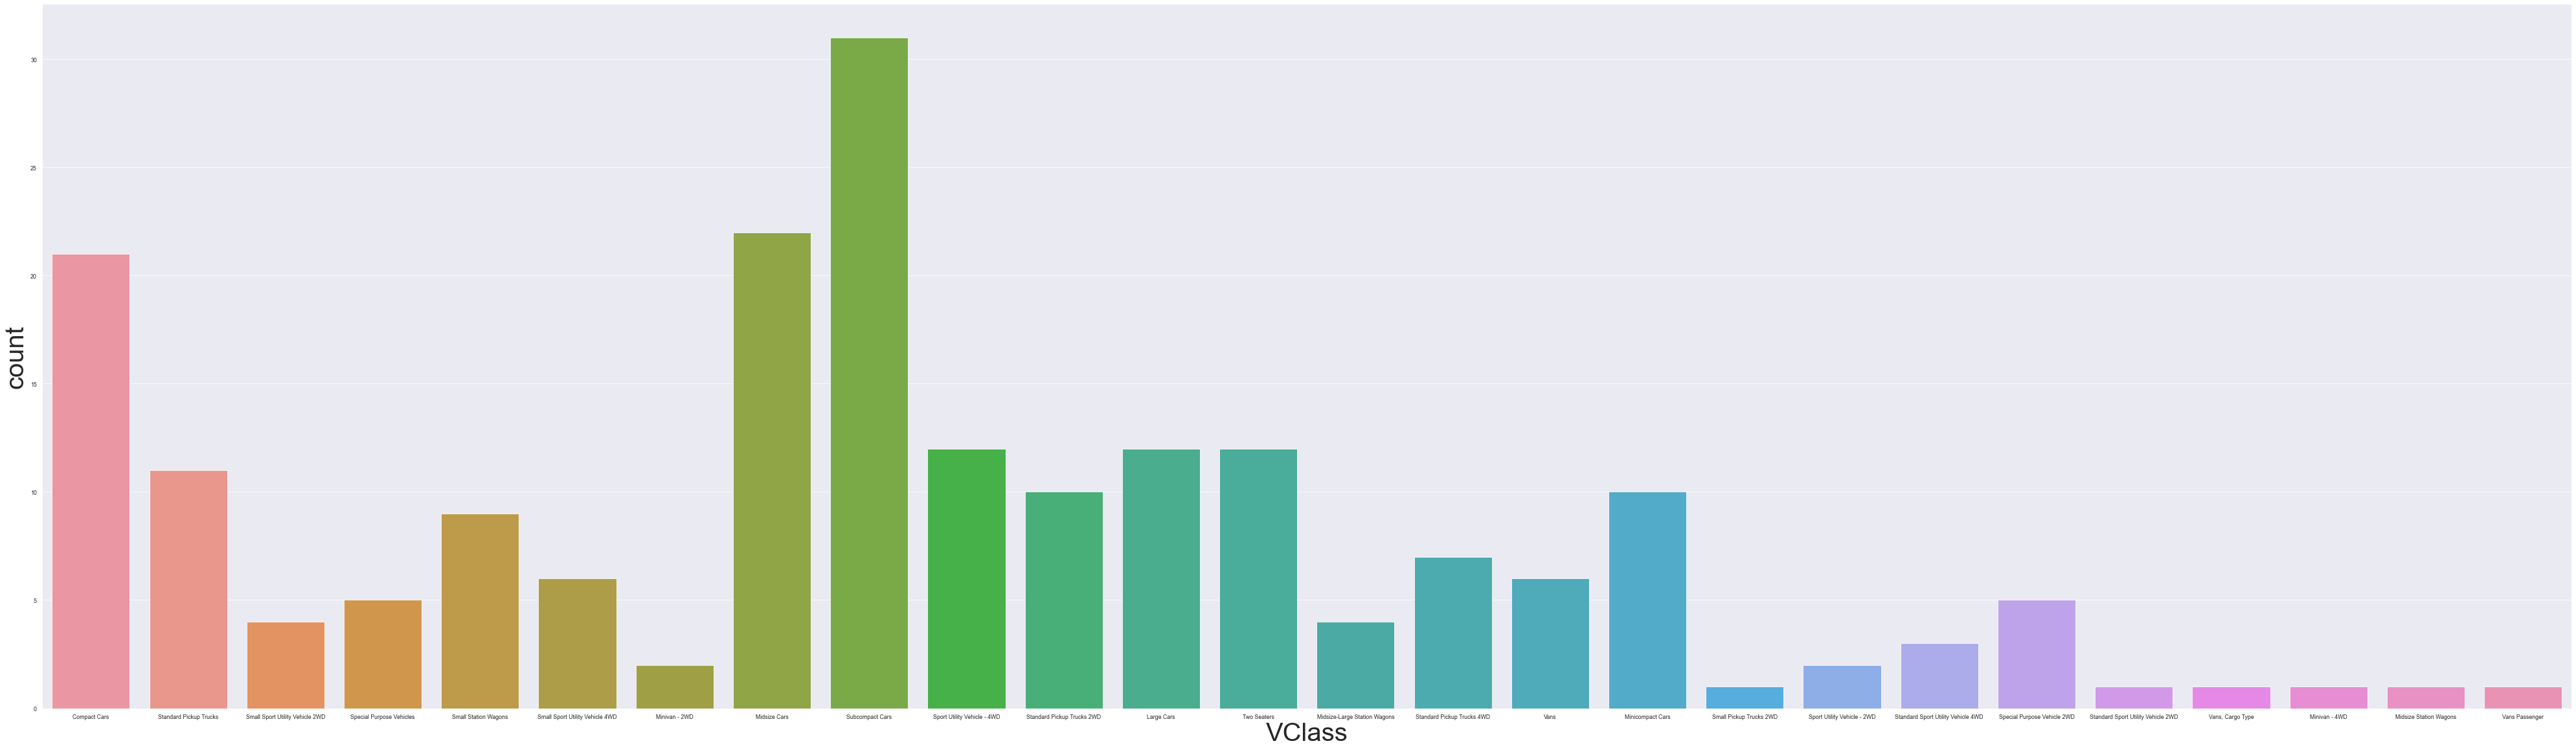

In [270]:
sns.set_context("paper", rc={"font.size":100,"axes.titlesize":100,"axes.labelsize":40})#,'figure.figsize':(70,20)})
sns.countplot(x='VClass',data=df)

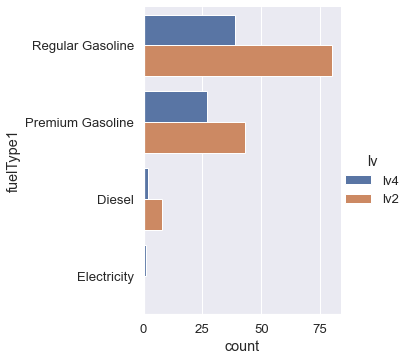

In [271]:
sns.set(font_scale=1.2)
sns.catplot(y='fuelType1',hue='lv',data=df,kind='count')

<AxesSubplot:xlabel='fuelType1', ylabel='ghgScore'>

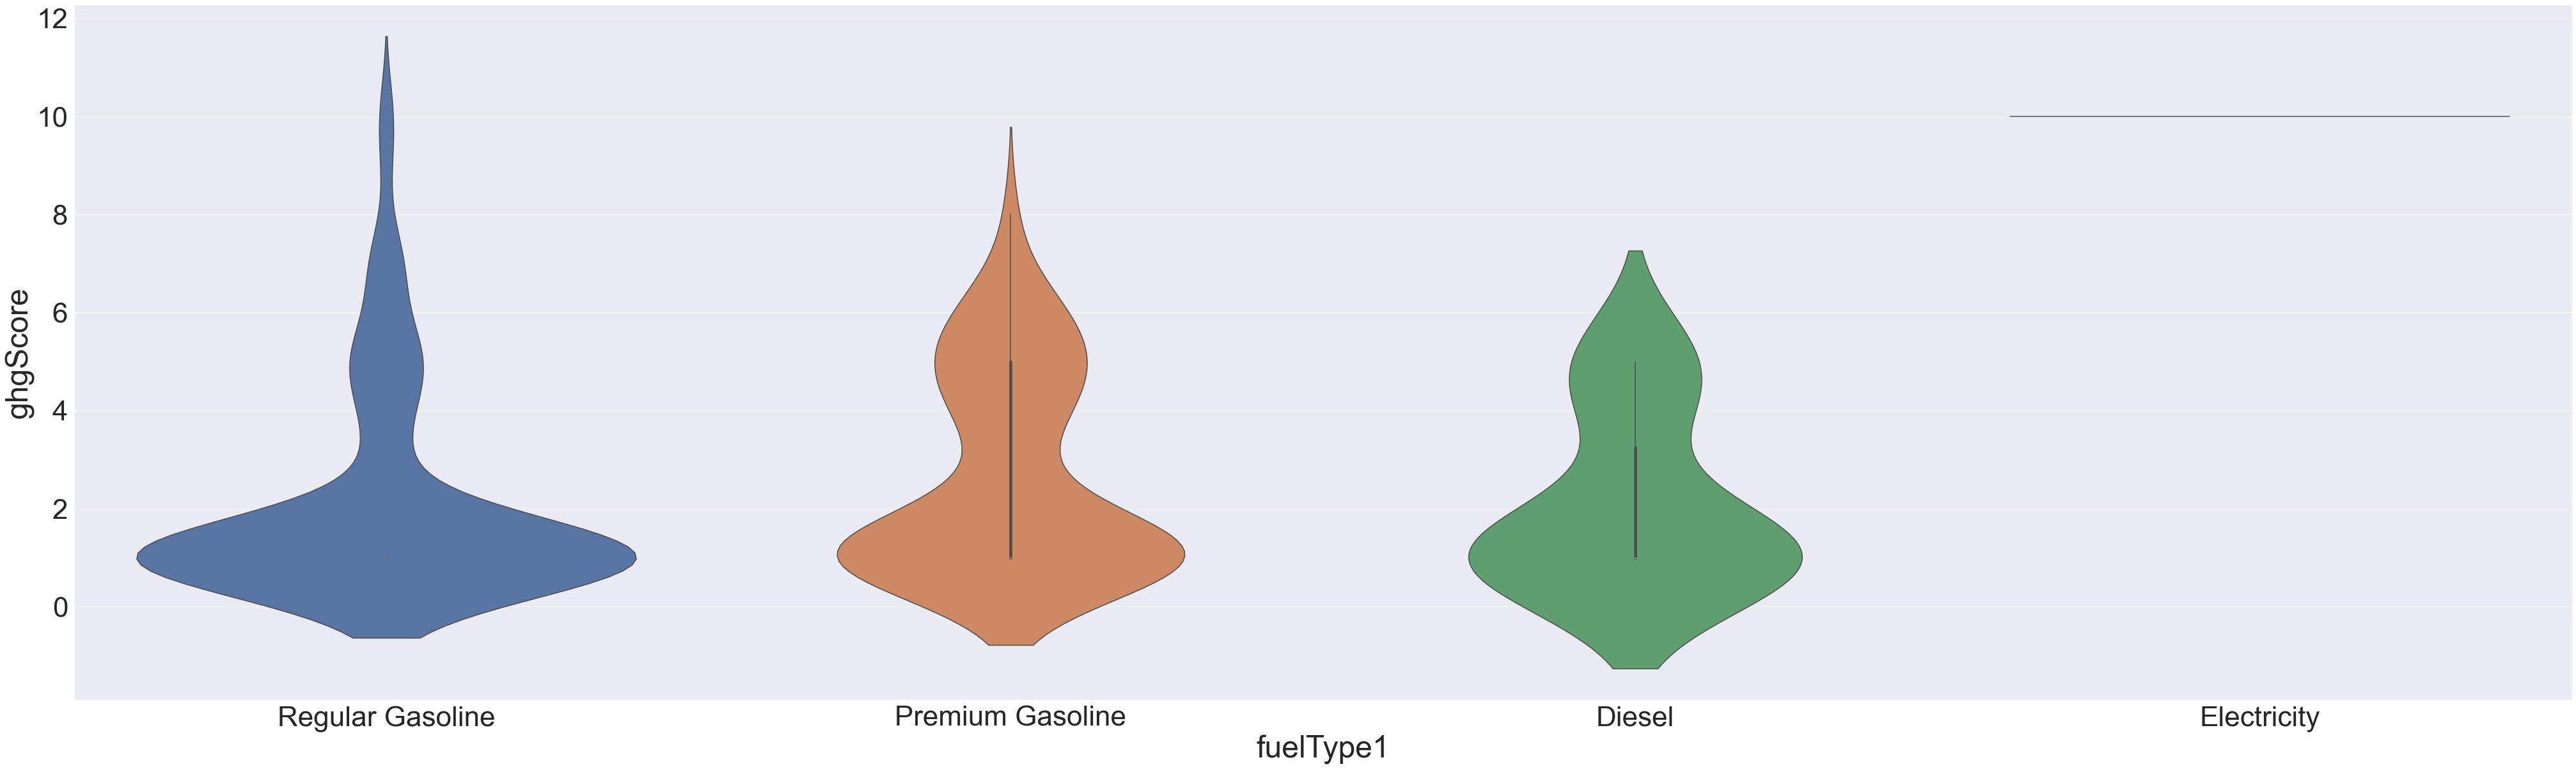

In [272]:
sns.set(font_scale=4)
sns.violinplot(x='fuelType1',y='ghgScore',data=df)

<AxesSubplot:xlabel='drive', ylabel='ghgScore'>

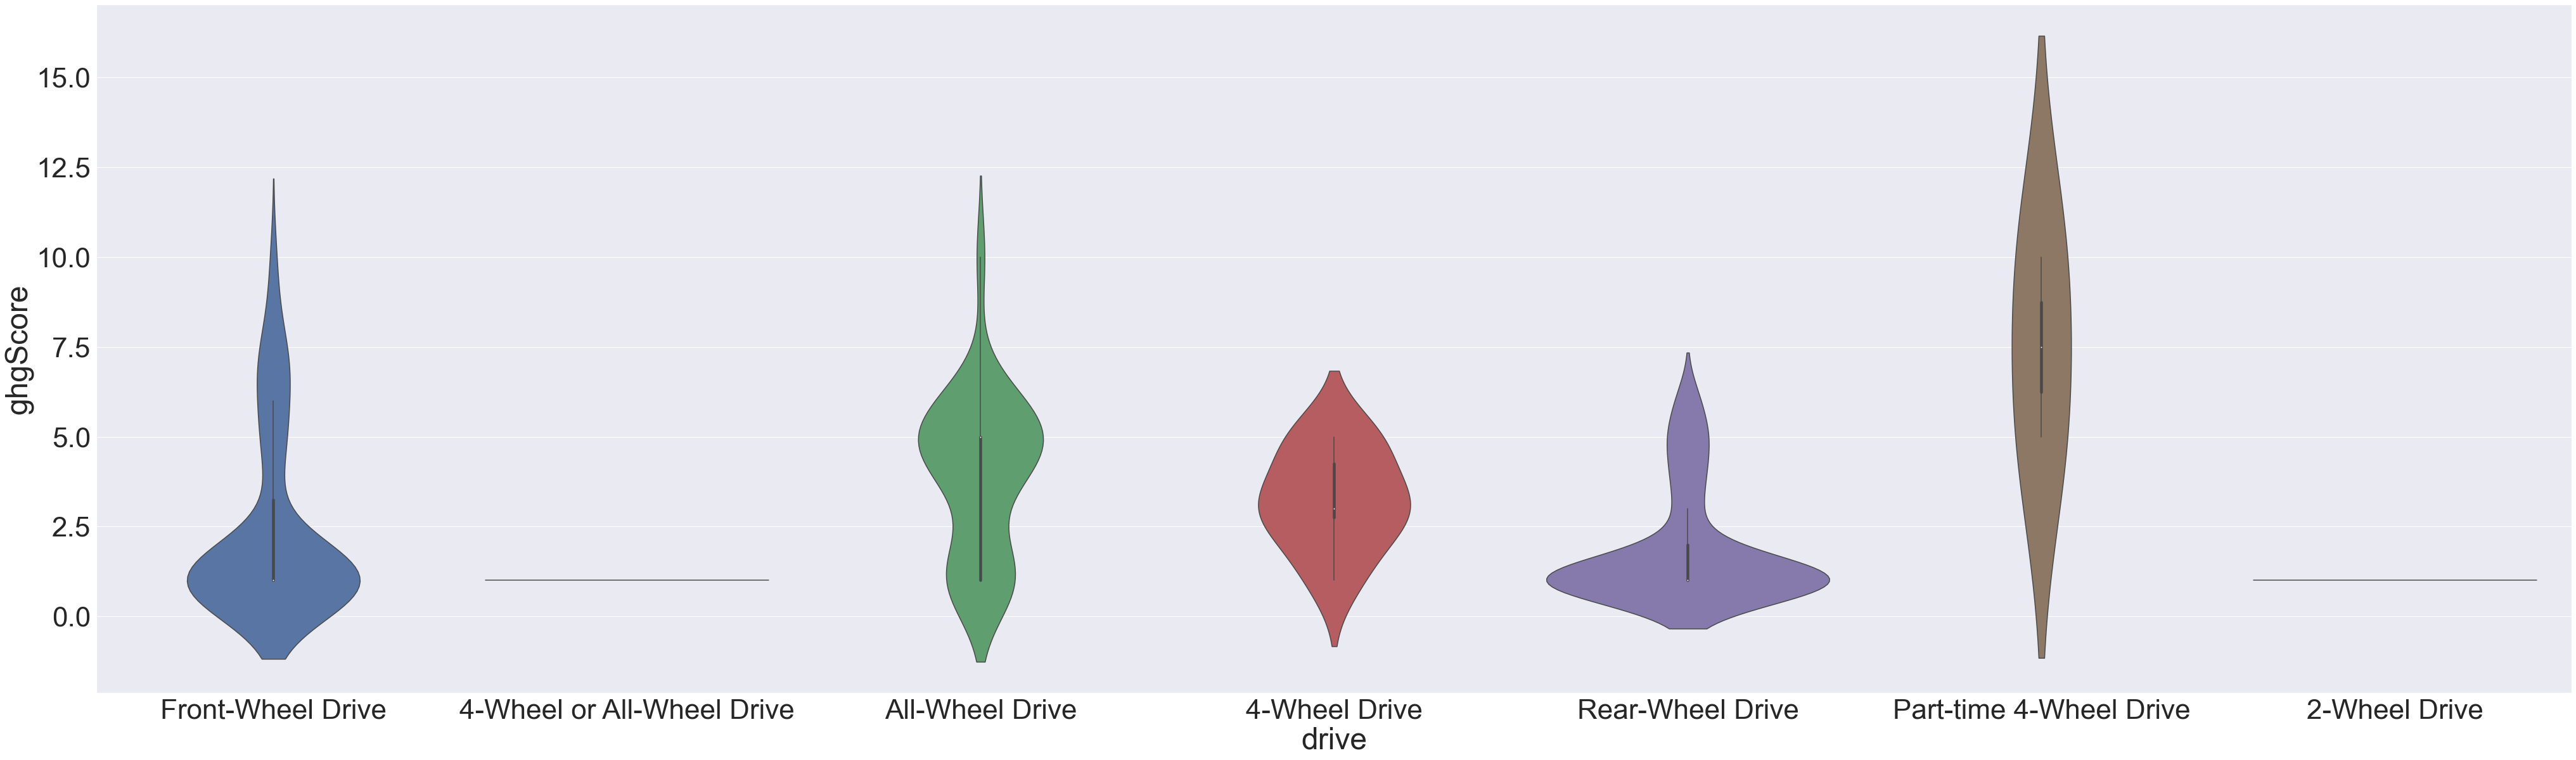

In [273]:
sns.violinplot(x='drive',y='ghgScore',data=df)

<AxesSubplot:xlabel='trany', ylabel='ghgScore'>

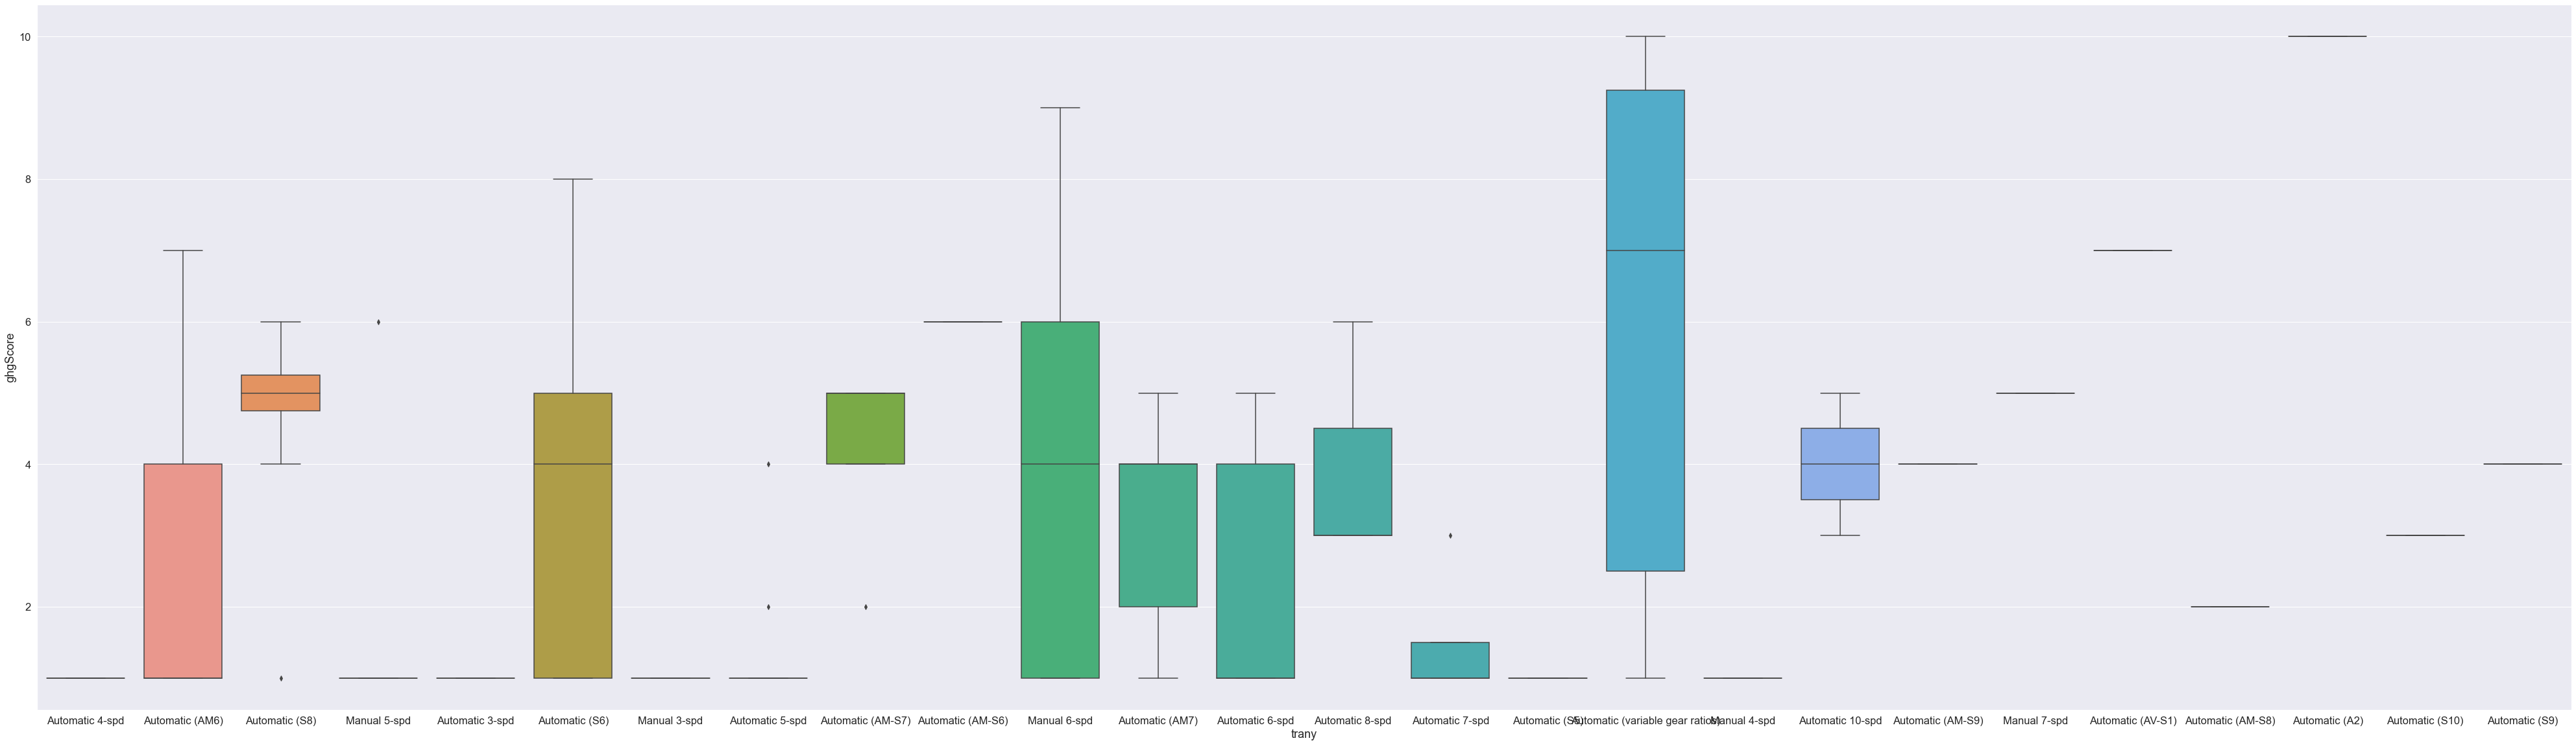

In [274]:
sns.set(font_scale=1.5)
sns.boxplot(x='trany',y='ghgScore',data=df)

<AxesSubplot:xlabel='drive', ylabel='ghgScore'>

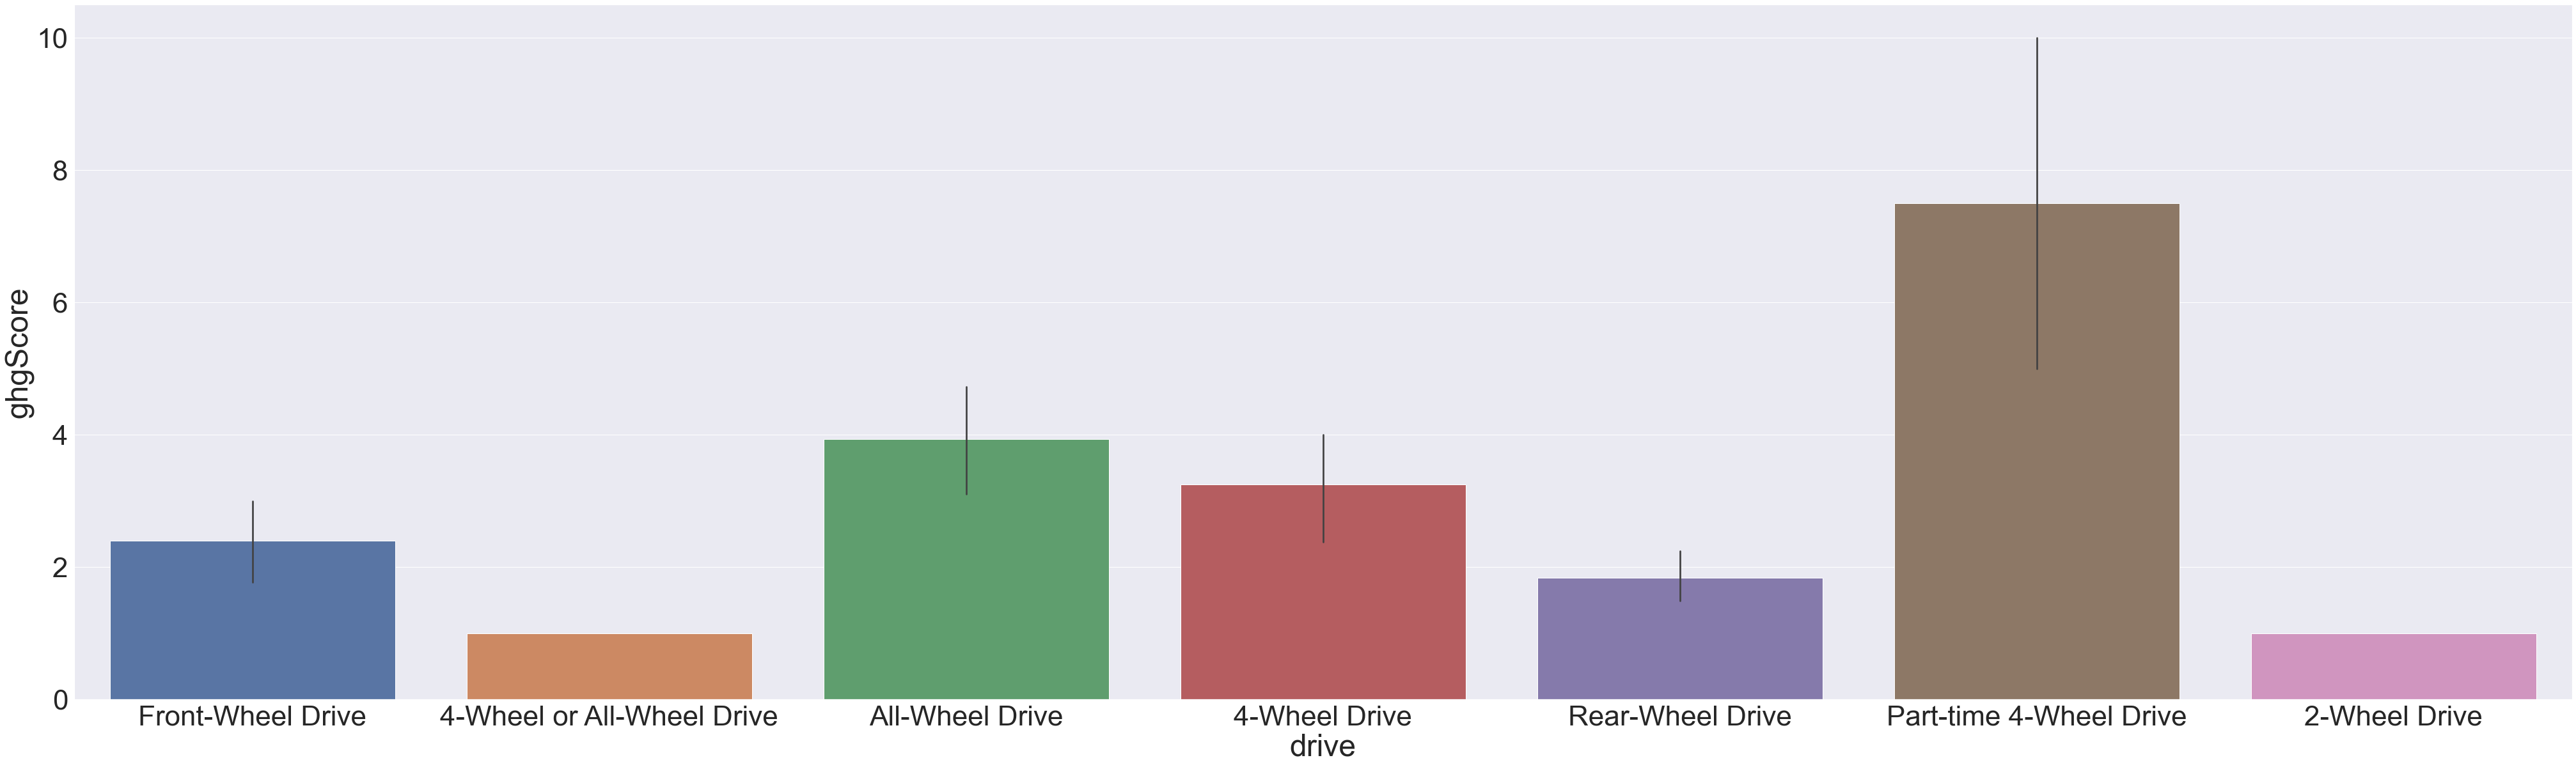

In [276]:
sns.set(font_scale=4)
sns.barplot(x='drive',y='ghgScore',data=df)

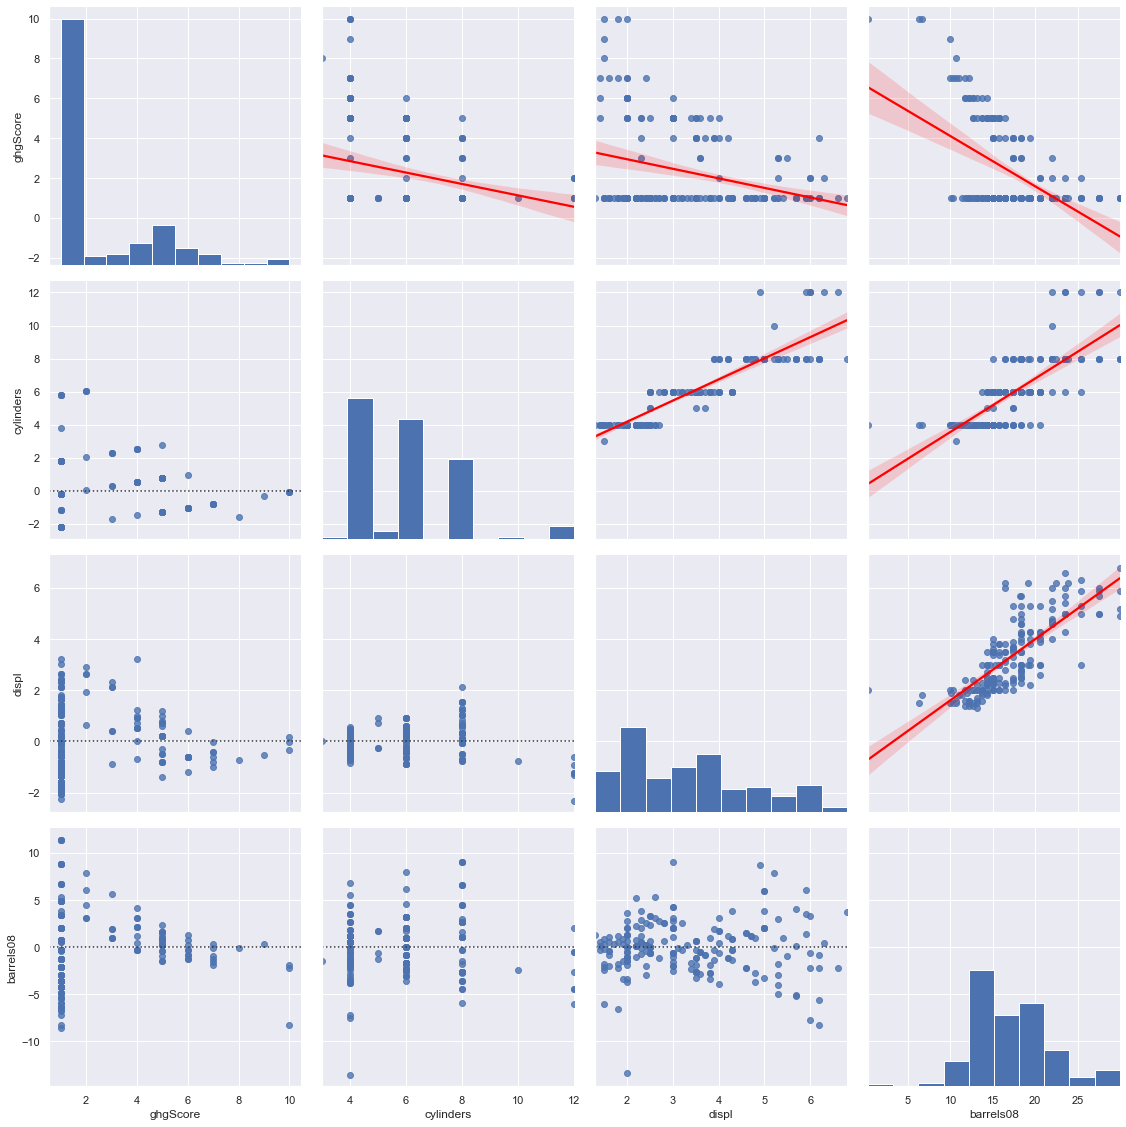

In [278]:
sns.set(font_scale=1)
g = sns.PairGrid(df[['ghgScore','cylinders','displ','barrels08']],size=4) 
g.map_upper(sns.regplot,line_kws={"color": "red"}) 
g.map_lower(sns.residplot) 
g.map_diag(plt.hist)

### Data Preprocessing

In [279]:
df=pd.get_dummies(df,columns=['VClass','drive','trany','fuelType1','phevBlended','pv','lv'],drop_first=True)

In [281]:
df.head()

,cylinders,displ,barrels08,ghgScore,rangeHwy,VClass_Large Cars,VClass_Midsize Cars,VClass_Midsize Station Wagons,VClass_Midsize-Large Station Wagons,VClass_Minicompact Cars,...,trany_Manual 4-spd,trany_Manual 5-spd,trany_Manual 6-spd,trany_Manual 7-spd,fuelType1_Electricity,fuelType1_Premium Gasoline,fuelType1_Regular Gasoline,pv_pv2,pv_pv4,lv_lv4
17911,6.0,2.5,14.982273,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
1608,6.0,3.9,20.600625,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
37667,4.0,2.0,17.347895,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
23940,4.0,2.0,13.184400,5,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1660,4.0,2.6,20.600625,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 17911 to 23873
Data columns (total 67 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   cylinders                                  200 non-null    float64
 1   displ                                      200 non-null    float64
 2   barrels08                                  200 non-null    float64
 3   ghgScore                                   200 non-null    int64  
 4   rangeHwy                                   200 non-null    int64  
 5   VClass_Large Cars                          200 non-null    uint8  
 6   VClass_Midsize Cars                        200 non-null    uint8  
 7   VClass_Midsize Station Wagons              200 non-null    uint8  
 8   VClass_Midsize-Large Station Wagons        200 non-null    uint8  
 9   VClass_Minicompact Cars                    200 non-null    uint8  
 10  VClass_Minivan - 2WD

In [283]:
x=df[df.columns.difference(['ghgScore'])]
y=df['ghgScore']

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

### Select ML Model

In [71]:
models={
    'LR':LinearRegression(),
    'KNN':KNeighborsRegressor(),
    'SVR':SVR(),
    'DT':DecisionTreeRegressor(),
    'XGBR':XGBRFRegressor(),
    'RF':RandomForestRegressor()
}

In [129]:
for name,model in models.items():
    print(f'using: {name}')
    model.fit(x_train,y_train)
    print(f'Train Accuracy: {model.score(x_train,y_train)}')
    print(f'Test Accuracy: {model.score(x_test,y_test)}')
    print('-'*30,'\n')

using: LR
Train Accuracy: 0.7399328006346981
Test Accuracy: -3.6750205887500866e+22
------------------------------ 

using: KNN
Train Accuracy: 0.9054887897520508
Test Accuracy: 0.851048641953343
------------------------------ 

using: SVR
Train Accuracy: 0.7384719789186591
Test Accuracy: 0.7105913384655753
------------------------------ 

using: DT
Train Accuracy: 0.9444390105898859
Test Accuracy: 0.8581829325559134
------------------------------ 

using: XGBR
Train Accuracy: 0.753996324772826
Test Accuracy: 0.7382899639425491
------------------------------ 

using: RF
Train Accuracy: 0.9404870947891766
Test Accuracy: 0.8722289753075192
------------------------------ 



In [72]:
model=RandomForestRegressor()
model.fit(x_train,y_train)
print(f'Train Accuracy: {model.score(x_train,y_train)}')
print(f'Test Accuracy: {model.score(x_test,y_test)}')

Train Accuracy: 0.9296454530069048
Test Accuracy: 0.87550480327468


In [75]:
import pickle
pickle_out = open("model.pkl", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [76]:
pickle_out = open("scaler.pkl", "wb")
pickle.dump(scaler, pickle_out)
pickle_out.close()